# LLM Workshop: Basic LangGraph with Prompting Techniques

This workshop covers:
- Introduction to LangGraph
- Basic LLM interactions
- Prompting techniques
- System prompts
- Building simple workflows

## Setup and Installation

In [8]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import Graph, StateGraph
from typing import TypedDict, List
from IPython.display import Markdown, display

# Load environment variables
load_dotenv()

# Initialize LLM
llm = ChatOpenAI(
    model="gpt-4o-mini", 
    temperature=0.7,
    max_tokens=100
)

## 1. Basic LLM Interaction

In [9]:
# Simple LLM call
response = llm.invoke([HumanMessage(content="What is artificial intelligence?")])
display(Markdown(response.content))

Artificial intelligence (AI) refers to the simulation of human intelligence processes by machines, particularly computer systems. These processes include learning (the acquisition of information and rules for using it), reasoning (the ability to solve problems through logical deduction), and self-correction. AI can be categorized into several types:

1. **Narrow AI (Weak AI)**: This type of AI is designed and trained for a specific task, such as language translation, image recognition, or playing a game. Most of the AI

## 2. Understanding System Prompts

System prompts define the AI's behavior and personality.

In [10]:
# Example with system prompt
messages = [
    SystemMessage(content="You are a helpful coding assistant. Always provide clear, concise explanations with code examples."),
    HumanMessage(content="Explain what a Python list is")
]

response = llm.invoke(messages)
display(Markdown(response.content))

A Python list is a built-in data structure that allows you to store a collection of items. Lists are ordered, mutable (changeable), and can contain elements of different data types, including numbers, strings, and even other lists. Lists are defined using square brackets `[]`, with elements separated by commas.

### Key Features of Python Lists:

1. **Ordered**: The items in a list maintain the order in which they were added. Each item has an index, starting from 0.



### Exercise 1: Create different personas with system prompts

In [11]:
# Try different system prompts
personas = {
    "teacher": "You are a patient teacher explaining concepts to beginners.",
    "expert": "You are a technical expert providing detailed analysis.",
    "creative": "You are a creative writer with a poetic style."
}

question = "What is machine learning?"

for persona, system_prompt in personas.items():
    print(f"\n=== {persona.upper()} RESPONSE ===")
    messages = [
        SystemMessage(content=system_prompt),
        HumanMessage(content=question)
    ]
    response = llm.invoke(messages)
    display(Markdown(response.content[:200] + "..."))


=== TEACHER RESPONSE ===


Machine learning is a branch of artificial intelligence (AI) that focuses on building systems that can learn from data and improve their performance over time without being explicitly programmed for e...


=== EXPERT RESPONSE ===


Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform tasks without explicit instructi...


=== CREATIVE RESPONSE ===


In the realm where data flows like streams,  
Machine learning weaves its intricate dreams.  
A dance of algorithms, both swift and smart,  
Teaching machines to play a human part.  

From vast oceans...

## 3. Prompting Techniques

### 3.1 Zero-shot Prompting

In [12]:
# Zero-shot: Direct question without examples
prompt = "Classify the sentiment of this text: 'I love this product!'"
response = llm.invoke([HumanMessage(content=prompt)])
display(Markdown(f"Zero-shot result: {response.content}"))

Zero-shot result: The sentiment of the text "I love this product!" is positive.

### 3.2 Few-shot Prompting

In [13]:
# Few-shot: Provide examples
few_shot_prompt = """
Classify the sentiment of the following texts as Positive, Negative, or Neutral:

Text: "This movie is amazing!"
Sentiment: Positive

Text: "I hate waiting in line."
Sentiment: Negative

Text: "The weather is okay today."
Sentiment: Neutral

Text: "I love this product!"
Sentiment:
"""

response = llm.invoke([HumanMessage(content=few_shot_prompt)])
display(Markdown(f"Few-shot result: {response.content}"))

Few-shot result: Sentiment: Positive

### 3.3 Chain-of-Thought Prompting

In [14]:
# Chain-of-thought: Ask for step-by-step reasoning
cot_prompt = """
Solve this step by step:

A restaurant has 15 tables. Each table can seat 4 people. 
If the restaurant is 80% full, how many people are currently dining?

Think through this step by step:
"""

response = llm.invoke([HumanMessage(content=cot_prompt)])
display(Markdown(response.content))

To find out how many people are currently dining in the restaurant, we can follow these steps:

1. **Calculate the total number of seats available in the restaurant:**
   - The restaurant has 15 tables.
   - Each table can seat 4 people.
   - Therefore, the total number of seats is calculated as follows:
     \[
     \text{Total seats} = \text{Number of tables} \times \text{Seats per table} = 15 \times 

In [15]:
llm = ChatOpenAI(
    model="gpt-4o-mini", 
    temperature=0.7,
    max_tokens=500
)

response = llm.invoke([HumanMessage(content=cot_prompt)])
display(Markdown(response.content))

To find out how many people are currently dining at the restaurant when it is 80% full, we can follow these steps:

1. **Calculate the total seating capacity of the restaurant**:
   - The restaurant has 15 tables.
   - Each table can seat 4 people.
   - Total seating capacity = Number of tables × Seats per table
   \[
   \text{Total seating capacity} = 15 \text{ tables} \times 4 \text{ people/table} = 60 \text{ people}
   \]

2. **Calculate how many people are dining when the restaurant is 80% full**:
   - If the restaurant is 80% full, we need to calculate 80% of the total seating capacity.
   - To find 80% of the total seating capacity, we multiply the total seating capacity by 0.80:
   \[
   \text{Number of people dining} = 0.80 \times \text{Total seating capacity} = 0.80 \times 60 \text{ people}
   \]
   \[
   \text{Number of people dining} = 48 \text{ people}
   \]

3. **Conclusion**:
   - Therefore, when the restaurant is 80% full, there are currently **48 people** dining.

Thus, the final answer is **48 people**.

## 4. Introduction to LangGraph

LangGraph helps build stateful, multi-step workflows with LLMs.

In [16]:
# Define state for our graph
class GraphState(TypedDict):
    messages: List[str]
    current_step: str
    result: str

### 4.1 Simple Linear Workflow

In [18]:
def analyze_text(state: GraphState) -> GraphState:
    """Analyze the input text"""
    text = state["messages"][-1]
    
    prompt = f"""
    Analyze the following text and provide:
    1. Main topic
    2. Sentiment
    3. Key themes
    
    Text: {text}
    """
    
    response = llm.invoke([HumanMessage(content=prompt)])
    
    state["current_step"] = "analysis"
    state["result"] = response.content
    
    return state

def summarize_analysis(state: GraphState) -> GraphState:
    """Create a summary of the analysis"""
    analysis = state["result"]
    
    prompt = f"""
    Create a brief summary of this analysis in 2-3 sentences:
    
    {analysis}
    """
    
    response = llm.invoke([HumanMessage(content=prompt)])
    
    state["current_step"] = "summary"
    state["result"] = response.content
    
    return state

In [19]:
# Build the graph
workflow = StateGraph(GraphState)

# Add nodes
workflow.add_node("analyze", analyze_text)
workflow.add_node("summarize", summarize_analysis)

# Add edges
workflow.add_edge("analyze", "summarize")

# Set entry point
workflow.set_entry_point("analyze")
workflow.set_finish_point("summarize")

# Compile the graph
app = workflow.compile()

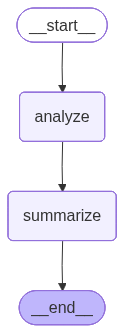

In [20]:
import os
from datetime import datetime
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

In [22]:
# Test the workflow
initial_state = {
    "messages": ["The rapid advancement of artificial intelligence is transforming industries worldwide. While it brings tremendous opportunities for innovation and efficiency, it also raises important questions about job displacement and ethical considerations."],
    "current_step": "start",
    "result": ""
}

result = app.invoke(initial_state)
print("Final Summary:")
display(Markdown((result["result"])))

Final Summary:


The analysis examines the dual impact of artificial intelligence across industries, recognizing both its transformative benefits, such as innovation and enhanced efficiency, and the significant challenges it poses, including job displacement and ethical dilemmas. While AI presents numerous opportunities for advancement, it also raises critical concerns that must be addressed to ensure responsible implementation.

## 5. Building a Conditional Workflow

In [23]:
def classify_query(state: GraphState) -> GraphState:
    """Classify the type of query"""
    query = state["messages"][-1]
    
    prompt = f"""
    Classify this query into one of these categories:
    - technical: Programming, coding, or technical questions
    - creative: Creative writing, brainstorming, or artistic requests
    - factual: Factual questions or information requests
    
    Query: {query}
    
    Respond with only the category name.
    """
    
    response = llm.invoke([HumanMessage(content=prompt)])
    classification = response.content.strip().lower()
    
    state["current_step"] = "classified"
    state["result"] = classification
    
    return state

def handle_technical(state: GraphState) -> GraphState:
    """Handle technical queries"""
    query = state["messages"][-1]
    
    system_prompt = "You are a senior software engineer. Provide detailed technical explanations with code examples."
    
    response = llm.invoke([
        SystemMessage(content=system_prompt),
        HumanMessage(content=query)
    ])
    
    state["current_step"] = "technical_response"
    state["result"] = response.content
    
    return state

def handle_creative(state: GraphState) -> GraphState:
    """Handle creative queries"""
    query = state["messages"][-1]
    
    system_prompt = "You are a creative writing assistant. Be imaginative and inspiring in your responses."
    
    response = llm.invoke([
        SystemMessage(content=system_prompt),
        HumanMessage(content=query)
    ])
    
    state["current_step"] = "creative_response"
    state["result"] = response.content
    
    return state

def handle_factual(state: GraphState) -> GraphState:
    """Handle factual queries"""
    query = state["messages"][-1]
    
    system_prompt = "You are a knowledgeable assistant. Provide accurate, well-structured information."
    
    response = llm.invoke([
        SystemMessage(content=system_prompt),
        HumanMessage(content=query)
    ])
    
    state["current_step"] = "factual_response"
    state["result"] = response.content
    
    return state

def route_query(state: GraphState) -> str:
    """Route to appropriate handler based on classification"""
    classification = state["result"]
    
    if "technical" in classification:
        return "technical"
    elif "creative" in classification:
        return "creative"
    else:
        return "factual"

In [24]:
# Build conditional workflow
conditional_workflow = StateGraph(GraphState)

# Add nodes
conditional_workflow.add_node("classify", classify_query)
conditional_workflow.add_node("technical", handle_technical)
conditional_workflow.add_node("creative", handle_creative)
conditional_workflow.add_node("factual", handle_factual)

# Add conditional edges
conditional_workflow.add_conditional_edges(
    "classify",
    route_query,
    {
        "technical": "technical",
        "creative": "creative",
        "factual": "factual"
    }
)

# Set entry and finish points
conditional_workflow.set_entry_point("classify")
conditional_workflow.set_finish_point("technical")
conditional_workflow.set_finish_point("creative")
conditional_workflow.set_finish_point("factual")

# Compile
conditional_app = conditional_workflow.compile()

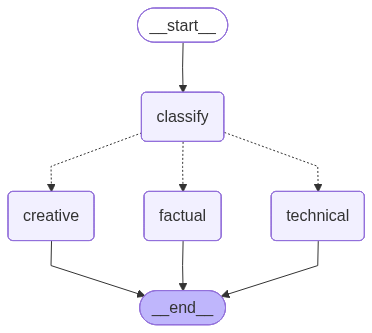

In [25]:
Image(conditional_app.get_graph().draw_mermaid_png())

### Test the conditional workflow

In [26]:
# Test with different query types
test_queries = [
    "How do I implement a binary search in Python?",
    "Write a short story about a robot learning to paint",
    "What is the capital of France?"
]

for query in test_queries:
    print(f"\n=== QUERY: {query} ===")
    
    state = {
        "messages": [query],
        "current_step": "start",
        "result": ""
    }
    
    result = conditional_app.invoke(state)
    print(f"Classification: {result['current_step']}")
    display(Markdown(f"Response: {result['result'][:200]}..."))


=== QUERY: How do I implement a binary search in Python? ===
Classification: technical_response


Response: Binary search is an efficient algorithm for finding an item from a sorted list of items. It works by repeatedly dividing the search interval in half. If the value of the search key is less than the it...


=== QUERY: Write a short story about a robot learning to paint ===
Classification: creative_response


Response: In a small workshop nestled between a bustling city and a tranquil forest, there lived a robot named Arlo. Arlo was designed for practical tasks—fixing machines, organizing tools, and assisting his cr...


=== QUERY: What is the capital of France? ===
Classification: factual_response


Response: The capital of France is Paris. It is not only the largest city in the country but also a major cultural, political, and economic center in Europe and the world. Paris is known for its historic landma...